<h1>1. Introduction

Exploring a dataset from a multinational consultancy firm to analyze and predict employee attrition based on various attributes collected over a certain period.

<h1>2. Importing Necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle
import squarify
import warnings
warnings.filterwarnings('ignore')

<h1>3. Loading the Dataset

Importing our Dataset and setting the Employee Number as the index

In [4]:
df = pd.read_csv('HR_DS.csv')
df.set_index('EmployeeNumber', inplace=True)

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


<h1> 3. Preliminary Data Analysis

Data Dimensions / Data Types / Missing Values

In [6]:
df.shape

(1470, 34)

In [7]:
df.duplicated().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                   147

<h1> 4. Exploratory Data Analysis (EDA)

In [9]:
# Set the max rows and columns to display
pd.options.display.max_rows = len(df)
pd.options.display.max_columns = len(df.columns)

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


EmployeeCount and StandardHours have a standard deviation of 0, meaning that the values are the same in every row.
<p>EmployeeCount = 0
<p>StandardHours = 80
<p> We will drop this variables

In [11]:
#df.drop(columns=["EmployeeCount"], inplace=True) 
#df.drop(columns=["StandardHours"], inplace=True)

In [12]:
# Reset max_rows and max_columns options to their default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [13]:
rate = df[['HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', 'OverTime']]
rate

,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,OverTime
EmployeeNumber,,,,,
1,94,1102,19479,5993,Yes
2,61,279,24907,5130,No
4,92,1373,2396,2090,Yes
5,56,1392,23159,2909,Yes
7,40,591,16632,3468,No
...,...,...,...,...,...
2061,41,884,12290,2571,No
2062,42,613,21457,9991,No
2064,87,155,5174,6142,Yes


In [14]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Over18 has only 1 value. We will drop this variable.

In [15]:
#df.drop(columns=["Over18"], inplace=True)

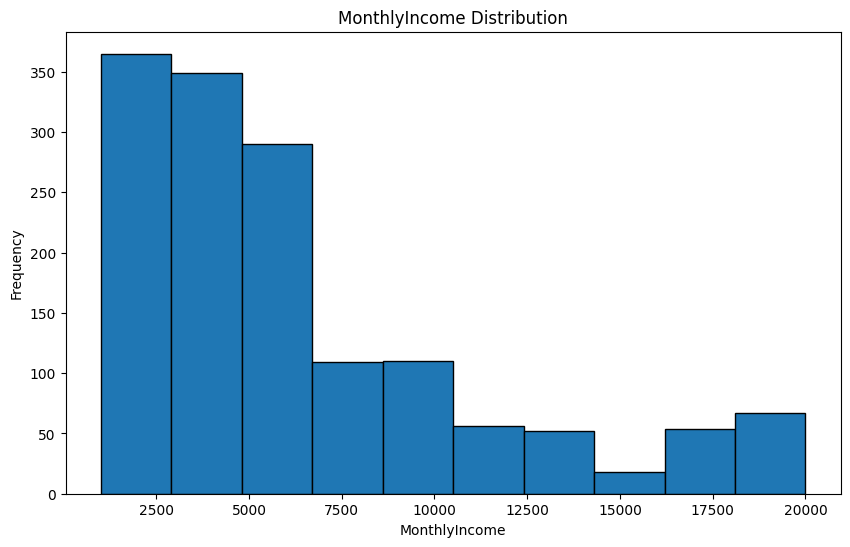

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyIncome'], bins=10, edgecolor='black')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.title('MonthlyIncome Distribution')
plt.show()

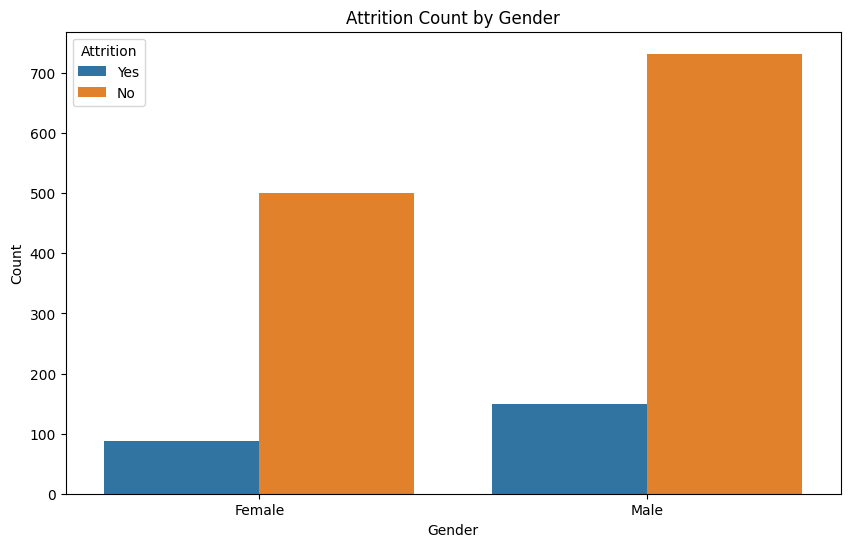

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Attrition Count by Gender')
plt.show()

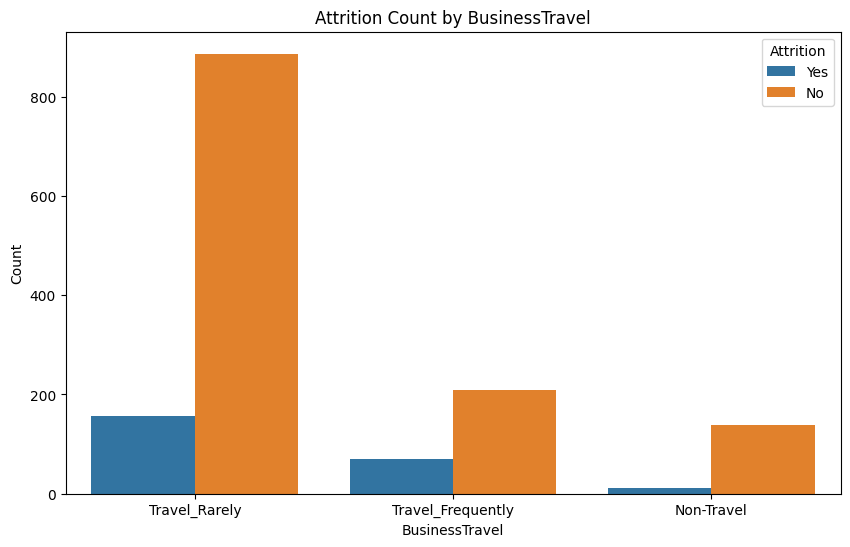

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.xlabel('BusinessTravel')
plt.ylabel('Count')
plt.title('Attrition Count by BusinessTravel')
plt.show()

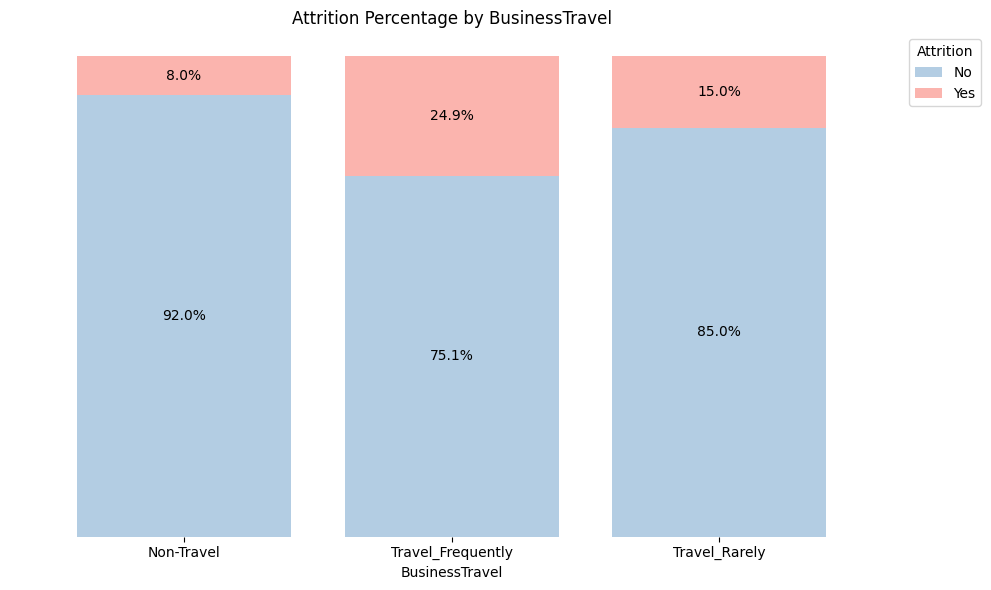

In [22]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [blue_color, red_color]

# First, we'll pivot the data to get the counts for each BusinessTravel category and Attrition status
pivot_df = df.groupby(['BusinessTravel', 'Attrition']).size().unstack().fillna(0)

# Convert these counts into percentages
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = pivot_df_percentage.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6), width=0.8)

# Set title and labels
plt.title('Attrition Percentage by BusinessTravel')
plt.xlabel('BusinessTravel')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 101, 10))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust the position of the legend to bring it closer to the plot
plt.legend(title='Attrition', bbox_to_anchor=(1.01, 1), loc='upper left')

# Remove the Y-axis labels and ticks
ax.set_ylabel('')
ax.set_yticks([])

# Display the percentages on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f"{height:.1f}%", ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

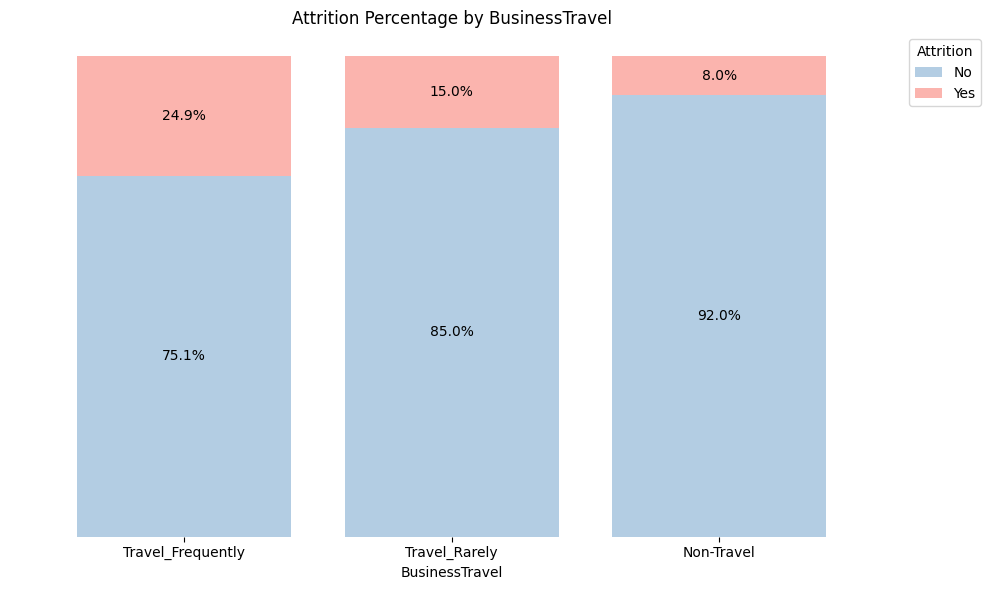

In [24]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [blue_color, red_color]

# First, we'll pivot the data to get the counts for each BusinessTravel category and Attrition status
pivot_df = df.groupby(['BusinessTravel', 'Attrition']).size().unstack().fillna(0)

# Convert these counts into percentages
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Reorder the DataFrame rows to match the desired order
pivot_df_percentage = pivot_df_percentage.reindex(['Travel_Frequently', 'Travel_Rarely', 'Non-Travel'])

# Plot the stacked bar chart
ax = pivot_df_percentage.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6), width=0.8)

# Set title and labels
plt.title('Attrition Percentage by BusinessTravel')
plt.xlabel('BusinessTravel')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 101, 10))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust the position of the legend to bring it closer to the plot
plt.legend(title='Attrition', bbox_to_anchor=(1.01, 1), loc='upper left')

# Remove the Y-axis labels and ticks
ax.set_ylabel('')
ax.set_yticks([])

# Display the percentages on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f"{height:.1f}%", ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

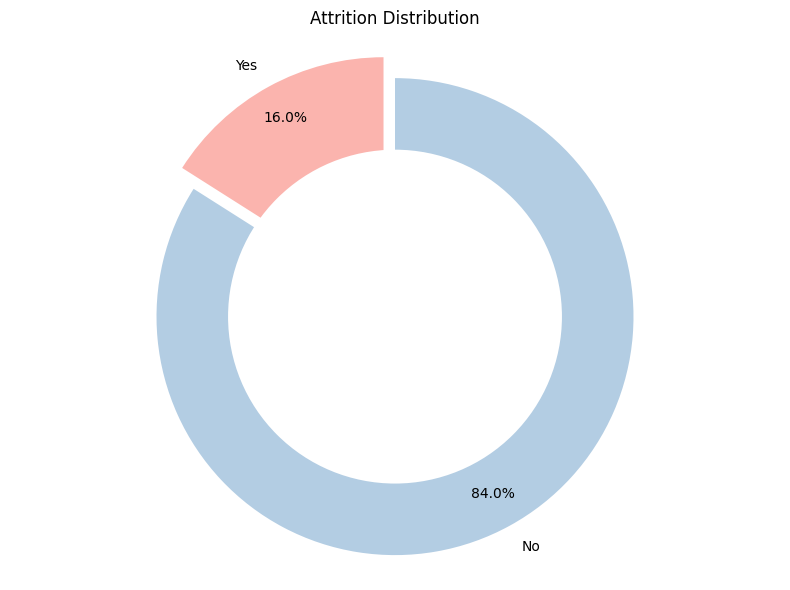

In [20]:
# Data
labels = ['Yes', 'No']
sizes = [16, 84]  # Percentages from the image
colors = [red_color, blue_color]  # Using the colors you've mentioned earlier
explode = (0.1, 0)  # To highlight the 'Yes' slice

# Create the donut chart
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle in the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Attrition Distribution')
plt.tight_layout()

plt.show()

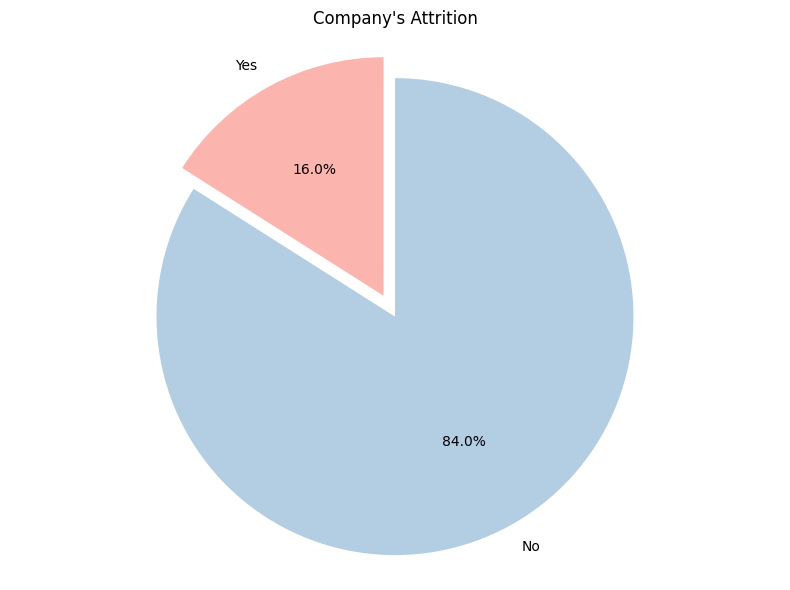

In [21]:
import matplotlib.pyplot as plt

# Data
labels = ['Yes', 'No']
sizes = [16, 84]  # Percentages from the image
colors = [red_color, blue_color]  # Using the colors you've mentioned earlier
explode = (0.1, 0)  # To highlight the 'Yes' slice

# Create the pie chart
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Company's Attrition")

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()

plt.show()

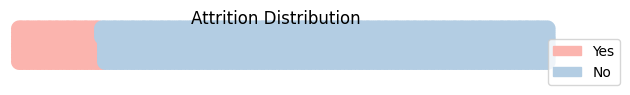

In [47]:
from pywaffle import Waffle

data = {'Yes': 237, 'No': 1233}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=[red_color, blue_color],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='circle', icon_size=12,
    title={'label': 'Attrition Distribution', 'loc': 'center'}
)
plt.show()

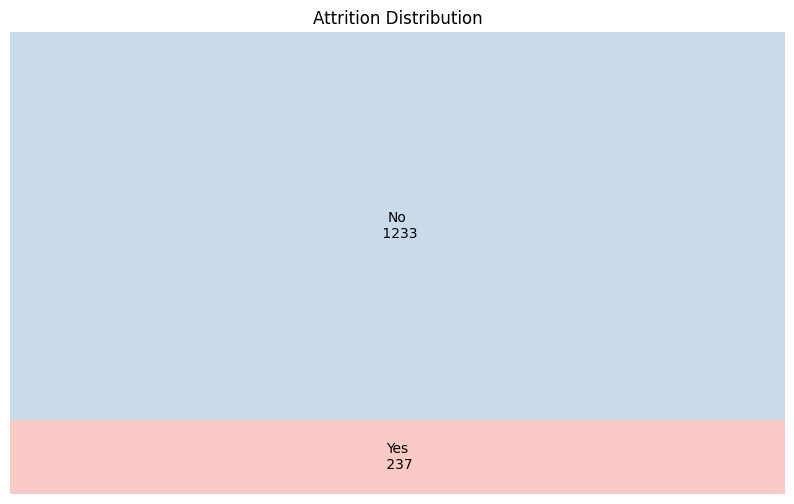

In [48]:
sizes = [237, 1233]
labels = ['Yes\n 237', 'No\n 1233']
color_list = [red_color, blue_color]

fig, ax = plt.subplots(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=color_list, alpha=0.7)
plt.title("Attrition Distribution")
plt.axis('off')
plt.show()

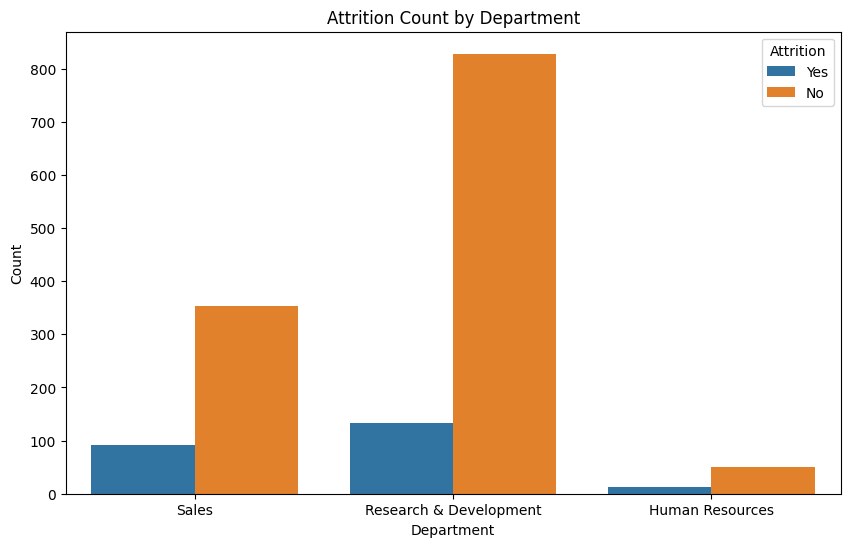

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Attrition Count by Department')
plt.show()

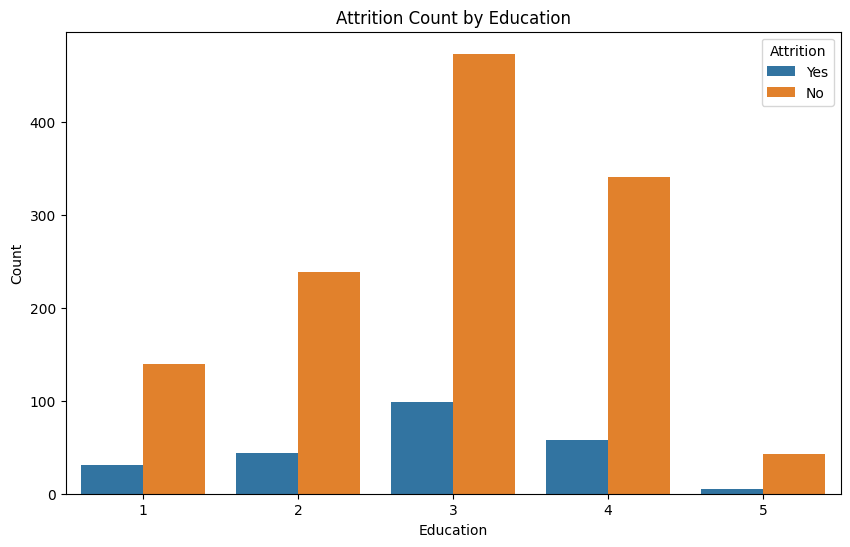

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Attrition Count by Education')
plt.show()

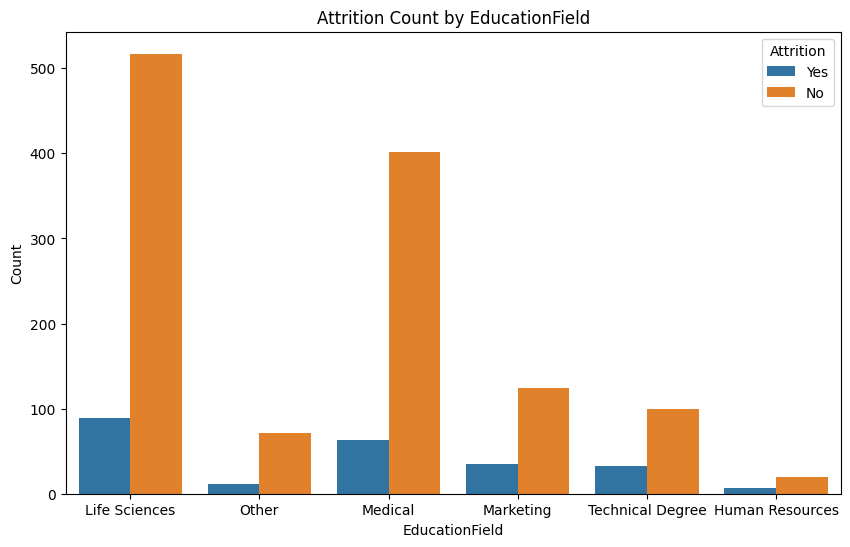

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', hue='Attrition', data=df)
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.title('Attrition Count by EducationField')
plt.show()

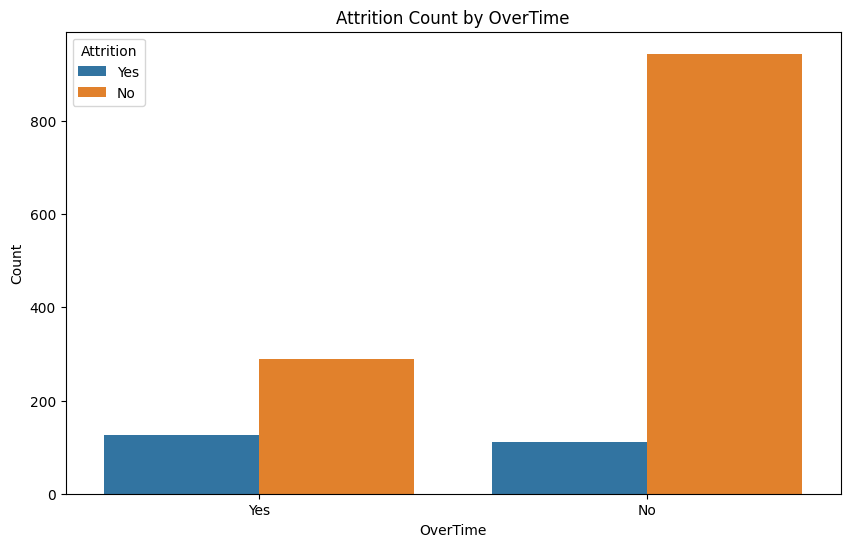

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Attrition Count by OverTime')
plt.show()

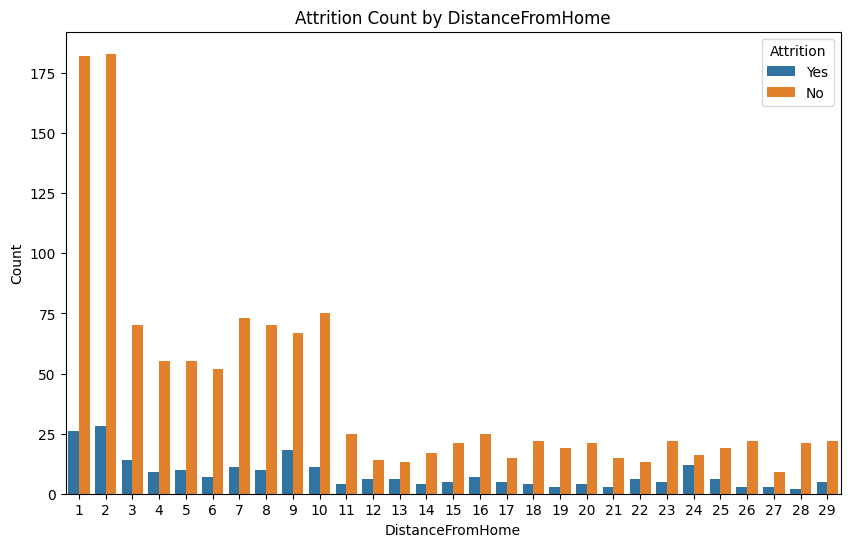

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df)
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.title('Attrition Count by DistanceFromHome')
plt.show()

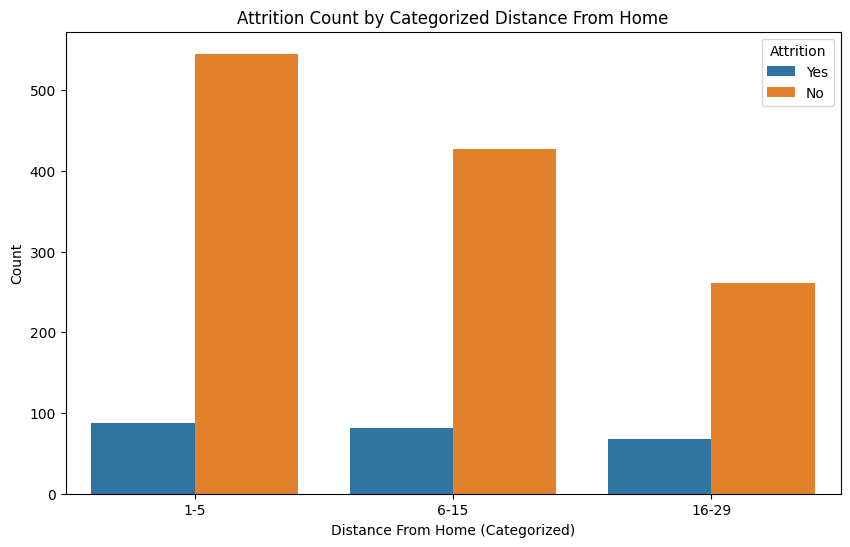

In [23]:
# Create a function to categorize distances
def categorize_distance(x):
    if 1 <= x <= 5:
        return '1-5'
    elif 6 <= x <= 15:
        return '6-15'
    elif 16 <= x <= 29:
        return '16-29'

# Apply the function to the 'DistanceFromHome' column
df['DistanceCategory'] = df['DistanceFromHome'].apply(categorize_distance)

# Plot the data
plt.figure(figsize=(10, 6))
sns.countplot(x='DistanceCategory', hue='Attrition', data=df, order=['1-5', '6-15', '16-29'])
plt.xlabel('Distance From Home (Categorized)')
plt.ylabel('Count')
plt.title('Attrition Count by Categorized Distance From Home')
plt.show()

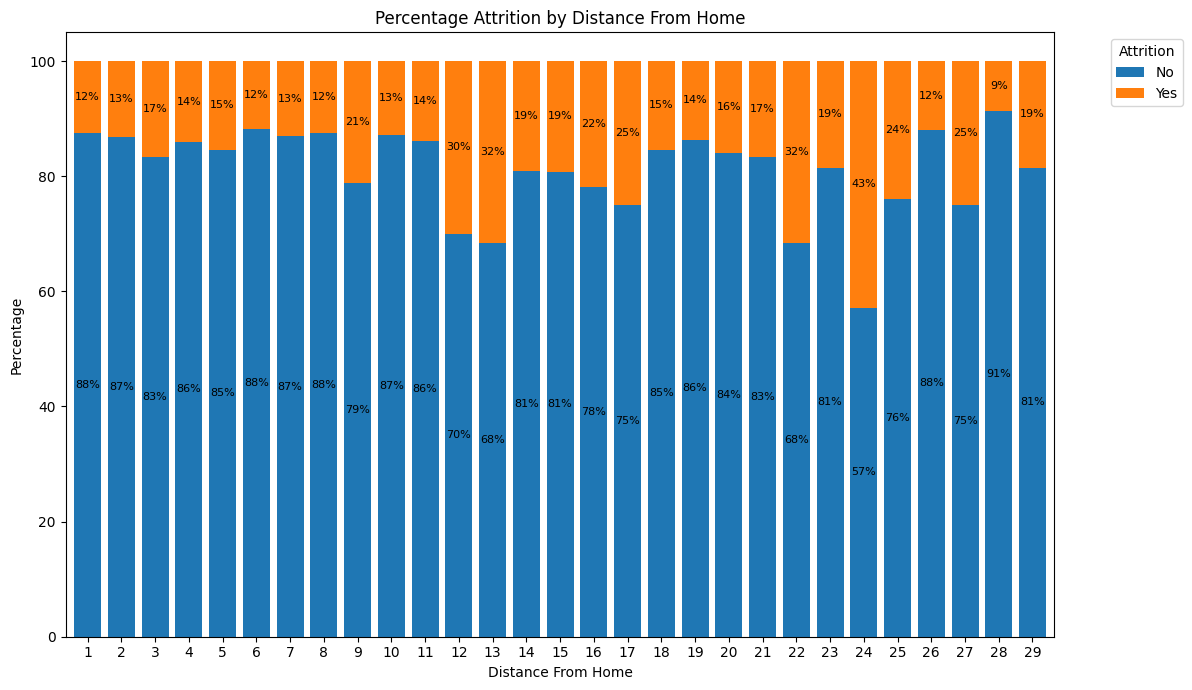

In [25]:
# Create a pivot table without distance categorization
pivot_df = df.groupby(['DistanceFromHome', 'Attrition']).size().unstack()

# Calculate the percentages
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Plot the data
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), width=0.8)
plt.title('Percentage Attrition by Distance From Home')
plt.ylabel('Percentage')
plt.xlabel('Distance From Home')
plt.xticks(rotation=0)
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations for clarity
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

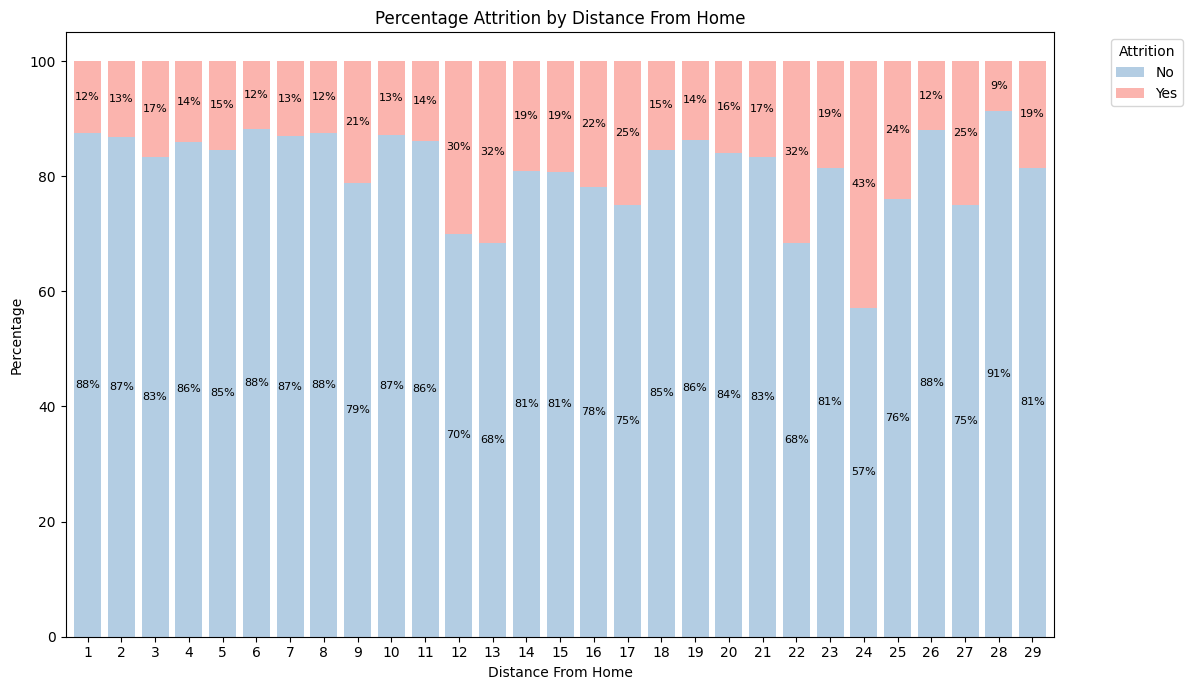

In [27]:
# Create a pivot table without distance categorization
pivot_df = df.groupby(['DistanceFromHome', 'Attrition']).size().unstack()

# Calculate the percentages
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Define the colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [blue_color if col == 'No' else red_color for col in pivot_df_percentage.columns]

# Plot the data
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), width=0.8, color=colors)
plt.title('Percentage Attrition by Distance From Home')
plt.ylabel('Percentage')
plt.xlabel('Distance From Home')
plt.xticks(rotation=0)
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations for clarity
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

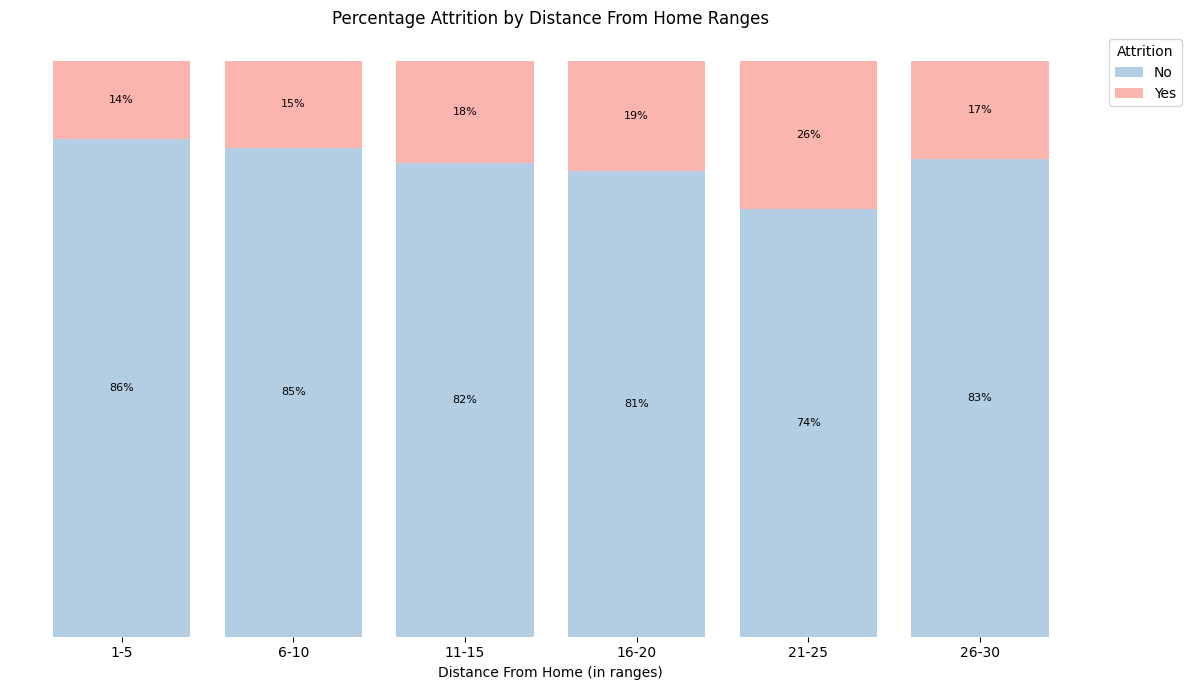

In [33]:
# Define distance bins
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']
df['DistanceBin'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, right=False)

# Create a pivot table with the distance bins
pivot_df = df.groupby(['DistanceBin', 'Attrition']).size().unstack()

# Calculate the percentages
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Define the colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [blue_color if col == 'No' else red_color for col in pivot_df_percentage.columns]

# Plot the data
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), width=0.8, color=colors)
plt.title('Percentage Attrition by Distance From Home Ranges')
plt.xlabel('Distance From Home (in ranges)')
plt.xticks(rotation=0)

# Adjust the position of the legend to bring it closer to the plot
plt.legend(title='Attrition', bbox_to_anchor=(1.01, 1), loc='upper left')

# Remove the borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove the Y-axis labels and ticks
ax.set_ylabel('')
ax.set_yticks([])

# Add annotations for clarity
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

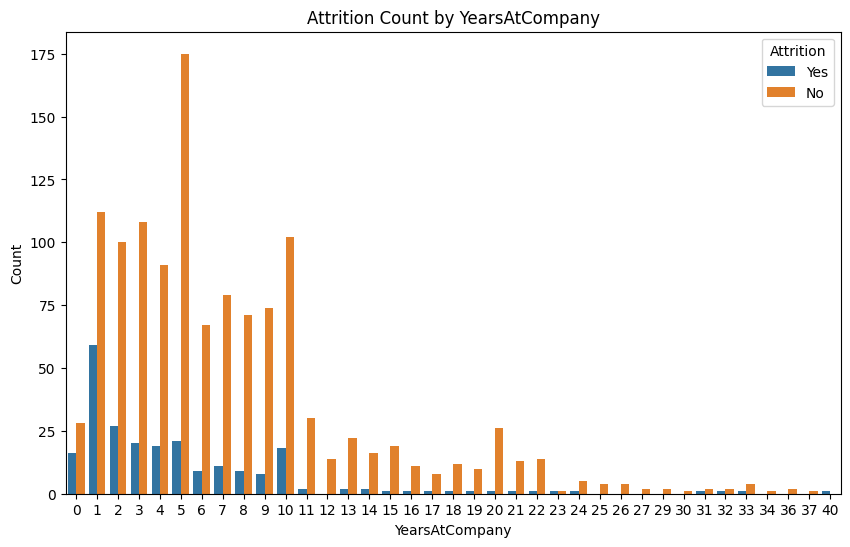

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df)
plt.xlabel('YearsAtCompany')
plt.ylabel('Count')
plt.title('Attrition Count by YearsAtCompany')
plt.show()

In [59]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


In [60]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') 

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [61]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


In [62]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [63]:
df.to_csv('Data_for_model.csv', index=False)

In [ ]:
num = df[['Age','DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]